## Data Analytics Lab 07: Imputation Methods

Use ‘recipe_missing.csv’ (missing dataset) and ‘recipe.csv’ (original dataset)

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

In [122]:
# Read the recipe dataset
recipe = pd.read_csv('recipe.csv')
recipe

,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime
0,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75
1,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60
2,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60
3,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60
4,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90
...,...,...,...,...,...,...,...,...,...,...
94,Witbier,175,23.00,1.052,1.011,5.36,18.92,3.26,29.00,90
95,Saison,134,3.79,1.056,1.012,5.73,26.51,9.94,4.73,60
96,American IPA,7,24.61,1.058,1.015,5.73,42.52,5.60,28.39,60
97,Saison,134,18.93,1.055,1.014,5.43,16.73,2.84,15.14,60


a) The dataset has missing data. Show the percentage of missing data for each
feature/column in ‘recipe_missing.csv’ and then plot in a bar chart.

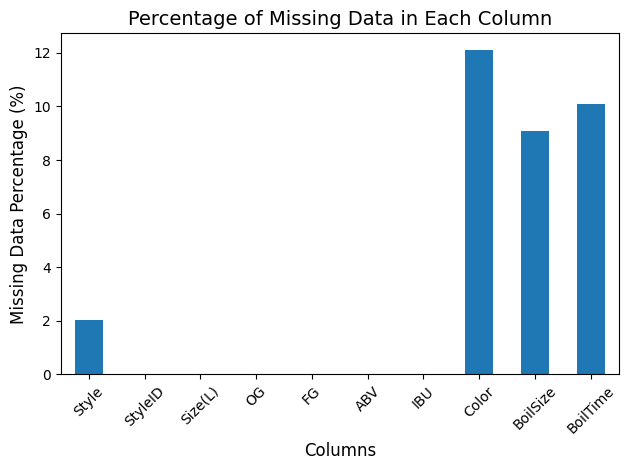

In [123]:
recipe_missing = pd.read_csv('recipe_missing.csv')
# Percentage of missing data in each column
# Simply takes (the number of missing values / total number of samples) * 100
missing_percentage = (recipe_missing.isnull().sum() /
                      len(recipe_missing)) * 100
# Plot in a bar chart
missing_percentage.plot(kind='bar')

# Adding labels and title for better readability
plt.title('Percentage of Missing Data in Each Column', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Missing Data Percentage (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotate column labels for readability
plt.tight_layout()  # Adjust the layout to prevent clipping

# Show the plot
plt.show()

b) Use KNNImputer, k = 5. Initialize missing data using SimpleImputer, using “mean”
strategy. Plot the histogram of imputed data and original data of the last 3 columns.
Compute the Mean Square Error (MSE) between actual data and imputed data.

In [124]:
last_cols = recipe_missing.columns[-3:]

In [125]:
simple_imputer = SimpleImputer(strategy="mean")
# Apply transformation (fills missing values with column means)
# Fit and transform only on the last 3 columns
imputed_part = simple_imputer.fit_transform(recipe_missing[last_cols])
# Replace only those columns in the original DataFrame
imputed = recipe_missing.copy()
imputed[last_cols] = imputed_part
# Show the result
imputed

,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime
0,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.830000,28.390,75.000000
1,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.640000,24.610,60.000000
2,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.980000,22.710,60.000000
3,American IPA,7,22.71,1.061,1.017,5.80,54.48,12.744138,26.500,60.000000
4,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.570000,60.000,90.000000
...,...,...,...,...,...,...,...,...,...,...
94,Witbier,175,23.00,1.052,1.011,5.36,18.92,12.744138,29.000,90.000000
95,Saison,134,3.79,1.056,1.012,5.73,26.51,9.940000,4.730,69.269663
96,American IPA,7,24.61,1.058,1.015,5.73,42.52,5.600000,28.805,60.000000
97,Saison,134,18.93,1.055,1.014,5.43,16.73,2.840000,15.140,60.000000


In [126]:
knn_imputer = KNNImputer(n_neighbors=3)
# Fit and transform only on the last 3 columns
imputed_part = knn_imputer.fit_transform(recipe_missing[last_cols])
# Replace only those columns in the original DataFrame
recipe_imputed = recipe_missing.copy()
recipe_imputed[last_cols] = imputed_part
# Show the result
recipe_imputed

,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime
0,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75.0
1,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60.0
2,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60.0
3,American IPA,7,22.71,1.061,1.017,5.80,54.48,12.67,26.50,60.0
4,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90.0
...,...,...,...,...,...,...,...,...,...,...
94,Witbier,175,23.00,1.052,1.011,5.36,18.92,7.98,29.00,90.0
95,Saison,134,3.79,1.056,1.012,5.73,26.51,9.94,4.73,70.0
96,American IPA,7,24.61,1.058,1.015,5.73,42.52,5.60,26.50,60.0
97,Saison,134,18.93,1.055,1.014,5.43,16.73,2.84,15.14,60.0


In [127]:
# Get the last three columns
recipe_imputed.iloc[:, len(recipe_imputed.columns)-3:]

,Color,BoilSize,BoilTime
0,4.83,28.39,75.0
1,15.64,24.61,60.0
2,8.98,22.71,60.0
3,12.67,26.50,60.0
4,4.57,60.00,90.0
...,...,...,...
94,7.98,29.00,90.0
95,9.94,4.73,70.0
96,5.60,26.50,60.0
97,2.84,15.14,60.0


In [128]:
recipe.iloc[:, len(recipe_imputed.columns)-3:]

,Color,BoilSize,BoilTime
0,4.83,28.39,75
1,15.64,24.61,60
2,8.98,22.71,60
3,8.50,26.50,60
4,4.57,60.00,90
...,...,...,...
94,3.26,29.00,90
95,9.94,4.73,60
96,5.60,28.39,60
97,2.84,15.14,60


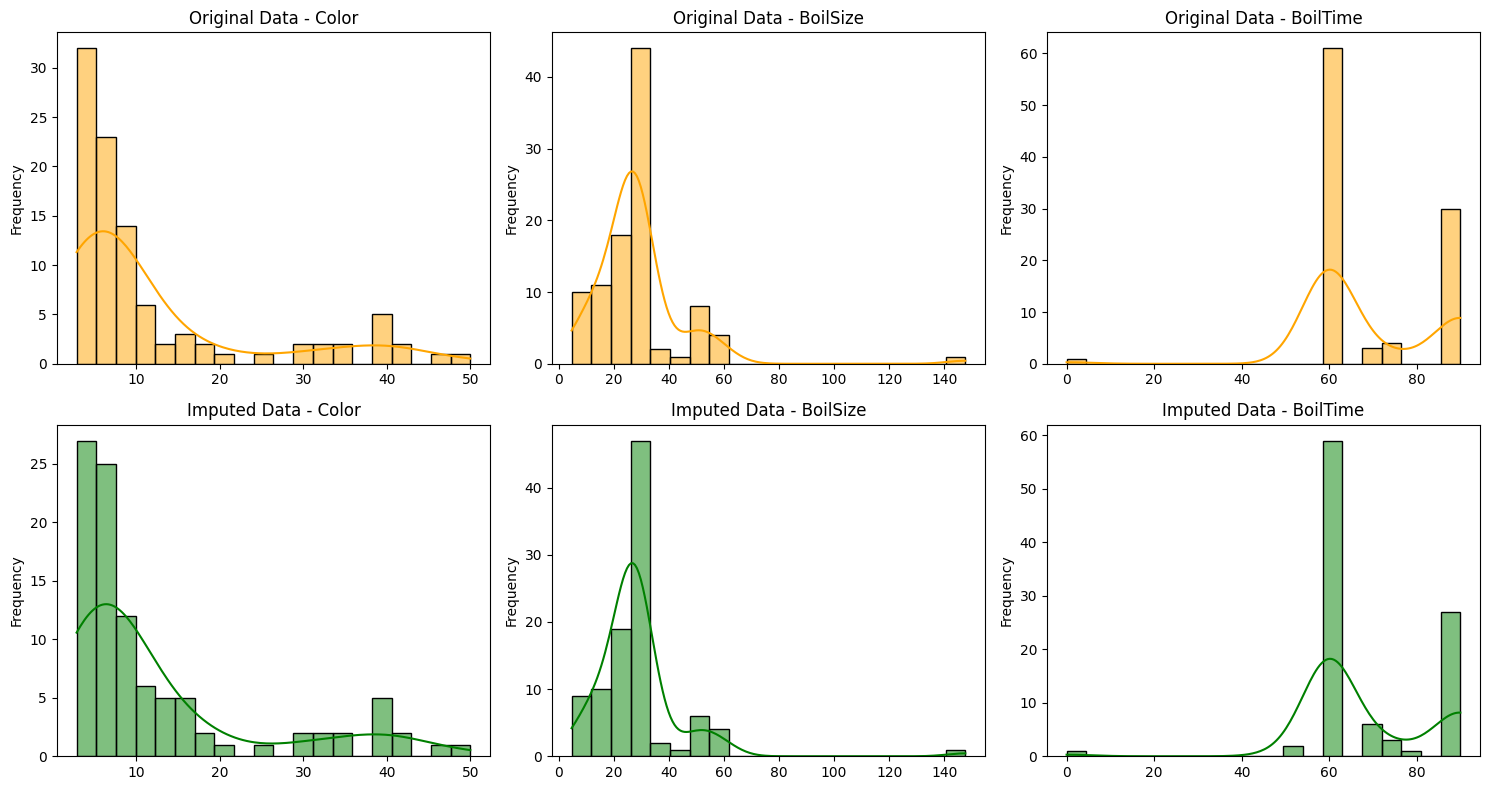

In [129]:
# Plot a Histogram of imputed data and original data
# Select the last 3 columns
last_cols = recipe_imputed.columns[-3:]
# Set up the figure
plt.figure(figsize=(15, 8))

# Loop through the last three columns
for i, col in enumerate(last_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(recipe[col], kde=True, color='orange', bins=20)
    plt.title(f'Original Data - {col}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 3, i+3)
    sns.histplot(recipe_imputed[col], kde=True, color='green', bins=20)
    plt.title(f'Imputed Data - {col}')
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [130]:
# Mean Squared Error
# Select last three columns
last_cols = recipe_imputed.columns[-3:]

for col in last_cols:
    # Identify positions where original data was missing
    # Retrieve its index
    missing_index = recipe_missing[col][recipe_missing[col].isnull()].index.tolist()
    # Retrieve from recipe_imputed
    predicted_values = recipe_imputed.loc[missing_index, col]
     # Extract actual true values from original dataset
    actual_values = recipe.loc[missing_index, col]
    # Compute and print MSE
    mse = mean_squared_error(actual_values, predicted_values)
    print(f"Mean Squared Error for {col}: {mse:.4f}")

Mean Squared Error for Color: 30.9554
Mean Squared Error for BoilSize: 161.1332
Mean Squared Error for BoilTime: 202.5000


c) Use MICE algorithm for 10 cycles. Initialize missing data using SimpleImputer, using
“mean” strategy. For each cycle, fill in the missing place using Itera veImputer and
es mator=DecisionTree Regressor. Plot the histogram of imputed data and original data
of the last 3 columns. Compute the Mean Square Error (MSE) between actual data and
imputed data.

In [131]:
last_cols = recipe_missing.columns[-3:]

In [132]:
simple_imputer = SimpleImputer(strategy="mean")
# Apply transformation (fills missing values with column means)
# Fit and transform only on the last 3 columns
imputed_part = simple_imputer.fit_transform(recipe_missing[last_cols])
# Replace only those columns in the original DataFrame
imputed = recipe_missing.copy()
imputed[last_cols] = imputed_part
# Show the result
imputed

,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime
0,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.830000,28.390,75.000000
1,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.640000,24.610,60.000000
2,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.980000,22.710,60.000000
3,American IPA,7,22.71,1.061,1.017,5.80,54.48,12.744138,26.500,60.000000
4,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.570000,60.000,90.000000
...,...,...,...,...,...,...,...,...,...,...
94,Witbier,175,23.00,1.052,1.011,5.36,18.92,12.744138,29.000,90.000000
95,Saison,134,3.79,1.056,1.012,5.73,26.51,9.940000,4.730,69.269663
96,American IPA,7,24.61,1.058,1.015,5.73,42.52,5.600000,28.805,60.000000
97,Saison,134,18.93,1.055,1.014,5.43,16.73,2.840000,15.140,60.000000


In [133]:
imputer = IterativeImputer(estimator=DecisionTreeRegressor(), max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(recipe_missing[last_cols])
# Replace only those columns in the original DataFrame
recipe_imputed_iter = recipe_missing.copy()
recipe_imputed_iter[last_cols] = imputed_part
# Show the result
recipe_imputed_iter

,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime
0,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.830000,28.390,75.000000
1,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.640000,24.610,60.000000
2,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.980000,22.710,60.000000
3,American IPA,7,22.71,1.061,1.017,5.80,54.48,12.744138,26.500,60.000000
4,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.570000,60.000,90.000000
...,...,...,...,...,...,...,...,...,...,...
94,Witbier,175,23.00,1.052,1.011,5.36,18.92,12.744138,29.000,90.000000
95,Saison,134,3.79,1.056,1.012,5.73,26.51,9.940000,4.730,69.269663
96,American IPA,7,24.61,1.058,1.015,5.73,42.52,5.600000,28.805,60.000000
97,Saison,134,18.93,1.055,1.014,5.43,16.73,2.840000,15.140,60.000000


In [139]:
recipe_imputed_iter.iloc[:, len(recipe_imputed.columns)-3:]

,Color,BoilSize,BoilTime
0,4.830000,28.390,75.000000
1,15.640000,24.610,60.000000
2,8.980000,22.710,60.000000
3,12.744138,26.500,60.000000
4,4.570000,60.000,90.000000
...,...,...,...
94,12.744138,29.000,90.000000
95,9.940000,4.730,69.269663
96,5.600000,28.805,60.000000
97,2.840000,15.140,60.000000


In [143]:
recipe.iloc[:, len(recipe_imputed.columns)-3:]

,Color,BoilSize,BoilTime
0,4.83,28.39,75
1,15.64,24.61,60
2,8.98,22.71,60
3,8.50,26.50,60
4,4.57,60.00,90
...,...,...,...
94,3.26,29.00,90
95,9.94,4.73,60
96,5.60,28.39,60
97,2.84,15.14,60


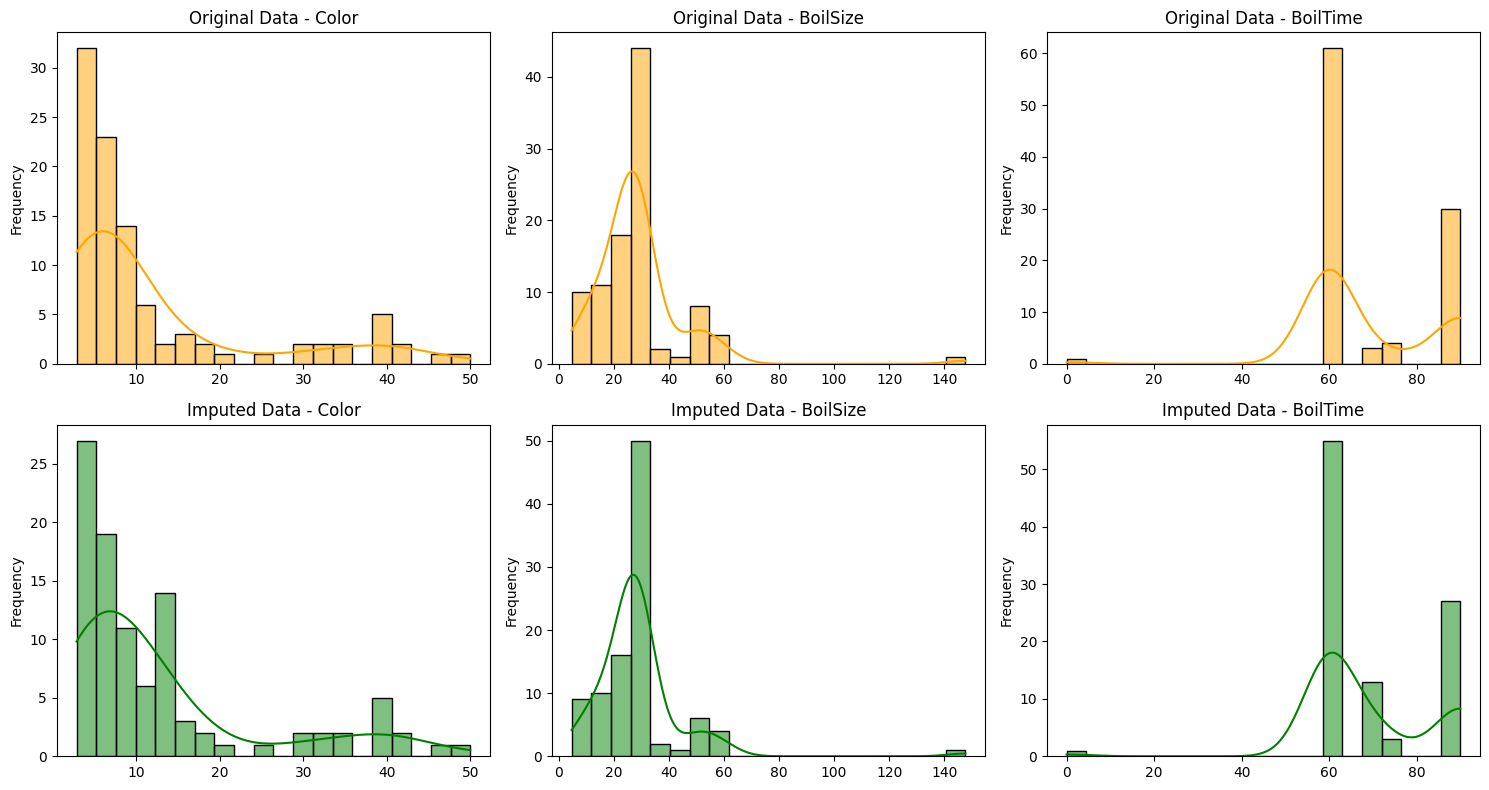

In [144]:
# Plot a Histogram of imputed data and original data
# Select the last 3 columns
last_cols = recipe_imputed_iter.columns[-3:]
# Set up the figure
plt.figure(figsize=(15, 8))

# Loop through the last three columns
for i, col in enumerate(last_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(recipe[col], kde=True, color='orange', bins=20)
    plt.title(f'Original Data - {col}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 3, i+3)
    sns.histplot(recipe_imputed_iter[col], kde=True, color='green', bins=20)
    plt.title(f'Imputed Data - {col}')
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [145]:
# Mean Squared Error
# Select last three columns
last_cols = recipe_imputed_iter.columns[-3:]

for col in last_cols:
    # Identify positions where original data was missing
    # Retrieve its index
    missing_index = recipe_missing[col][recipe_missing[col].isnull()].index.tolist()
    # Retrieve from recipe_imputed
    predicted_values = recipe_imputed_iter.loc[missing_index, col]
     # Extract actual true values from original dataset
    actual_values = recipe.loc[missing_index, col]
    # Compute and print MSE
    mse = mean_squared_error(actual_values, predicted_values)
    print(f"Mean Squared Error for {col}: {mse:.4f}")

Mean Squared Error for Color: 51.5671
Mean Squared Error for BoilSize: 157.4245
Mean Squared Error for BoilTime: 183.7637


## Compare the methods

KNNImputer imputes missing values based on the Nearest Neighbors. IterativeImputer applies MICE Imputation method that is a method of filling missing values by training a ML Model to predict the missing values.
- Pros: More sophisticated than traditional imputations; Captures relationships or similarities between features.
- Cons: Both methods start by imputing the missing values with mean, mode, or median. And then covers these values to reassign them. The result might still be close to the mean, mode, or median

Even advanced methods like KNNImputer and IterativeImputer cannot generate truly “new” extreme values. They improve accuracy by considering patterns in the dataset, but the imputed values tend to be close to the mean/median/mode initially, which can reduce variance or distort rare/extreme values.